# Analysis of Temperature Extremes using ORAS5 Reanalysis

Production date: 27-12-2025

Produced by: Joan Armajach and Blanca Fernández-Álvarez - IMEDEA (CSIC-UIB) [[webpage]](https://imedea.uib-csic.es/) 

## 🌍 Use case: Evaluating marine extreme temperature events, the case of the Blob

## ❓ Quality assessment questions
* **How reliable is ORAS5 for studying marine temperature extremes, such as marine heatwaves?**

Extreme events are considered unusual climate anomalies that occur rarely and differ significantly in magnitude from typical conditions in a region [[1]](https://doi.org/10.1146/annurev-marine-032720-095144). In the ocean, one of the most relevant is extremely warm ocean temperatures, leading to substantial biological and economic impacts [[2]](https://doi.org/10.5670/oceanog.2018.205). This phenomenon is known as marine heatwave (MHW), a term first introduced by [[3]](https://fish.gov.au/Archived-Reports/Documents/Pearce_et_al_2011.pdf). MHWs are defined as discrete and prolonged periods of anomalously high sea surface temperature (SST) which can be characterized by their duration, intensity, spatial extent and rate of evolution [[4]](https://doi.org/10.1016/j.pocean.2015.12.014). Increases in mean SST or changes in its variability can alter the metrics and properties of MHWs [[5]](https://doi.org/10.1007/s00382-019-04707-2). These extreme events have become more frequent and persistent over recent decades as a result of anthropogenic climate change [[4](https://doi.org/10.1016/j.pocean.2015.12.014), [5](https://doi.org/10.1007/s00382-019-04707-2), [6](https://doi.org/10.1038/s41586-018-0383-9)]. Over the last century, MHWs have increased by 54% in annual days globally from 1925 to 2016, as reported in [[7]](https://doi.org/10.1038/s41467-018-03732-9). Marine ecosystems have demonstrated high vulnerability to MHWs, with major mortality events, especially habitat-forming organisms such as corals, seagrass, and kelp [[8]](https://doi.org/10.1038/s44358-025-00058-5). At present, one of the largest and longest MHWs ever recorded occurred in the Northeast (NE) Pacific from the boreal fall of 2013 to early 2016, known as "the Blob" [[9]](https://doi.org/10.1002/2015GL063306). This anomalously warm SST event, originating in the Gulf of Alaska and extending to the North American coastline, exceeded 6 °C above normal in some areas [[10]](https://doi.org/10.1029/2019JD030780). In recent years, the case of the Blob has been extensively studied, with the objective of understanding its origin and the mechanisms that maintained it for such an extended period (e.g., [[10](https://doi.org/10.1029/2019JD030780), [11](https://doi.org/10.1029/2018GL078242), [12](https://doi.org/10.1038/nclimate3082)]), thus becoming one of the most significant MHWs ever detected. 

This notebook aims to assess the performance of ORAS5 reanalysis in detecting MHWs, focusing on the Blob event in the NE Pacific from the fall of 2013 to early 2016. 

## 📢 Quality assessment statement

```{admonition} These are the key outcomes of this assessment
:class: note

* A prominent anomalous warm seawater event, known as "the Blob", occurred in the Northeast (NE) Pacific between 2013 and 2016, becoming the largest and most persistent marine heatwave (MHW). Remarkable sea surface temperature (SST) anomalies were detected, especially in the Blob region, reaching values of approximately 2°C. The duration of this extreme event consisted of two persistent MHWs. The first occurred at the origin of the Blob, from late 2013 to late 2014, with a peak intensity between August and October 2014. The second persisted from early 2015 to late 2015, with its peak also appearing from August to October 2015. Temperature anomalies extended from the surface to 150 m depth. The prolonged subsurface warming played a key role in the formation of multiyear MHW events, as in the case of the Blob. 

* Wind stress magnitude anomalies present different patterns during winter (November–January) and summer (August–October) of 2014–2015. In winter, mainly negative anomalies are observed over the NE Pacific, indicating weak surface winds. By summer, more positive anomalies appear in some regions, reflecting a partial strengthening of the wind stress, although winds remain relatively weak. This pattern of winds led to a shallow mixed layer and prolonged upper ocean heating, which contributed to more pronounced SST anomalies.       

* ORAS5 dataset represents an ideal tool for studying temperature extreme events, such as MHWs, and their physical drivers. These results have been verified with other similar studies using reanalysis, such as [[9](https://doi.org/10.1002/2015GL063306), [10](https://doi.org/10.1029/2019JD030780), [14](https://doi.org/10.1038/s41612-023-00327-0)] and in-situ data [[16]( https://doi.org/10.1029/2021JC018356)].
```

## 📋 Methodology

In this study, we use the [ORAS5 global ocean reanalysis from the Copernicus Climate Data Store (CDS)](https://cds.climate.copernicus.eu/datasets/reanalysis-oras5?tab=overview). This dataset provides monthly gridded data projected onto a tripolar model grid with a resolution of 0.25° x 0.25° over the global ocean. Here, we use the two products that constitute ORAS5: the "Consolidated" (1958–2014) and the "Operational" (2015 to present). The main differences between these two products are the atmospheric reanalysis forcing used and the type of observations (reprocessed for the Consolidated and near real-time observations for the Operational). Detailed information is available on the [CDS](https://cds.climate.copernicus.eu/datasets/reanalysis-oras5?tab=overview). 

For the evaluation of how reliably this product detects marine heatwaves (MHWs), we use sea surface temperature (SST) measurements for the studied period. As reported in [[13]](https://doi.org/10.5194/os-15-779-2019), ORAS5 uses updated versions of observational datasets, with special emphasis on the consistency of SST data. To study the driving mechanisms of the Blob in more detail, we use additional variables available from the ORAS5 reanalysis dataset. These include potential temperature (to analyze the zonal-depth sections), zonal and meridional wind stress (representing the horizontal shear along the "x" and "y" axes), mixed layer depth (MLD) using a fixed threshold of 0.03 kg m⁻³, and the surface downward energy flux, including both solar and non-solar heat fluxes. 

The analysis and results are organised in the following steps, which are detailed in the sections below:

**[](section-1)**
 * Import required libraries
 * Define request for ORAS5 reanalysis
 * Download and transform

**[](section-2)**

**[](section-3)**
 * General parameters
 * Sea surface temperature (SST)
 * Wind stress components
 * Mixed layer depth and net downward heat flux 

**[](section-4)**
 * Physical mechanisms and characteristics of the Blob     

## 📈 Analysis and results

(section-1)=
### 1. Data selection and setup

#### Import required libraries

First, we import the required packages. 

In [1]:
# Load required modules
import xarray as xr
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
from matplotlib.patches import Patch, Rectangle
from matplotlib.colors import TwoSlopeNorm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
from collections import defaultdict
from c3s_eqc_automatic_quality_control import diagnostics, download, utils

plt.style.use("seaborn-v0_8-notebook")

#### Data request for ORAS5 reanalysis 

In this section, we define several variables from the [ORAS5 reanalysis dataset](https://cds.climate.copernicus.eu/datasets/reanalysis-oras5?tab=download), as described in the Methodology Section. The main parameters are: "Sea surface temperature" (°C), "Mixed layer depth 0.03" (m), "Net downward heat flux" (W m⁻²), "Zonal wind stress" (N m⁻²), and "Meridional wind stress" (N m⁻²). All of these have a single level (surface) vertical resolution. For this assessment, we choose the time interval from 1979–01 to 2016–01 (38 years) to obtain a consistent climatology. We apply a regional mask covering only latitudes from 30°N to 60°N and longitudes from 160°W to 120°W, representing the NE Pacific, where the Blob occurred. Additionally, we use "Potential temperature" (°C) at all depth levels but only at a single point, corresponding to the center of the Blob (approximately 45°N, 140°W). For all variables, we use both the operational and the consolidated products. 

In [2]:
# Time 
start = "1979-01"
stop = "2016-01"

# Id collection (dataset)
collection_id = "reanalysis-oras5"

# NE Pacific 
lat_slice = slice(30, 60)
lon_slice = slice(-160, -120)

# Variables
variables = [
    "sea_surface_temperature",
    "meridional_wind_stress",
    "mixed_layer_depth_0_03",
    "net_downward_heat_flux",
    "zonal_wind_stress",
]

# Define request 1
request_1 = defaultdict(list)
for variable in variables:
    for date in pd.date_range(start, stop, freq="1MS"):
        request_1[variable].append(
            {
                "vertical_resolution": "single_level",
                "variable": variable,
                "product_type": "operational" if date.year > 2014 else "consolidated",
                "year": date.strftime("%Y"),
                "month": date.strftime("%m"),
            }
        )
        
grid_request_1 = (
    collection_id,
    {
        "vertical_resolution": "single_level",
        "variable": "net_downward_heat_flux",
        "product_type": "consolidated",
        "year": "1979",
        "month": "01",
    },
)

# Same time but only in one single point, representing the center of the Blob
lat_centerBlob = slice(44.9, 45.1)
lon_centerBlob = slice(-140.1, -139.9)

# Define request 2
request = {
    "vertical_resolution": "all_levels",
    "variable": ["potential_temperature"],
}

requests = []
for date in pd.date_range(start, stop, freq="1MS"):
    requests.append(
        request
        | {
            "product_type": "operational" if date.year > 2014 else "consolidated",
            "year": date.strftime("%Y"),
            "month": date.strftime("%m"),
        }
    )

#### Download and transform

Here, we define a function named "regionalise_and_interpolate" for the wind stress variables, since they are not on the same grid. ORAS5 uses staggered grids, so the zonal and meridional components are not located at the cell center (as for other variables), but instead on the cell faces. For this reason, these values are interpolated using the "nearest_s2d" (nearest source-to-destination) method. Now, we can download and transform the requested datasets. 

In [3]:
def regionalise_and_interpolate(
    ds, lat_slice, lon_slice, grid_request_1, **regrid_kwargs
):
    ds_grid = download.download_and_transform(
        *grid_request_1,
        transform_func=utils.regionalise,
        transform_func_kwargs={"lon_slice": lon_slice, "lat_slice": lat_slice},
        quiet=True,
    )
    return diagnostics.regrid(ds, ds_grid, **regrid_kwargs)

# Download and transform (Request 1)
datasets = []
for variable, request_1 in request_1.items():
    print(f"{variable=}")
    transform_func_kwargs = {"lon_slice": lon_slice, "lat_slice": lat_slice}
    if "wind_stress" in variable: # we interpolate since are not on the same grid
        transform_func = regionalise_and_interpolate
        transform_func_kwargs.update(
            {"grid_request_1": grid_request_1, "method": "nearest_s2d"}
        )
    else:
        transform_func = utils.regionalise
    rolling = {}
    ds = download.download_and_transform(
        collection_id,
        request_1,
        transform_func=transform_func,
        transform_func_kwargs=transform_func_kwargs,
    )
    datasets.append(ds)
ds = xr.merge(datasets, compat="override") 

# Download and transform (Request 2)
print(f"variable='potential_temperature'")
ds_PT = download.download_and_transform(
    collection_id,
    requests,
    transform_func=utils.regionalise,
    transform_func_kwargs={"lon_slice": lon_centerBlob, "lat_slice": lat_centerBlob},
)

variable='sea_surface_temperature'


100%|██████████| 445/445 [00:23<00:00, 18.70it/s]


variable='meridional_wind_stress'


100%|██████████| 445/445 [00:28<00:00, 15.76it/s]


variable='mixed_layer_depth_0_03'


100%|██████████| 445/445 [00:22<00:00, 19.85it/s]


variable='net_downward_heat_flux'


100%|██████████| 445/445 [01:00<00:00,  7.36it/s]


variable='zonal_wind_stress'


100%|██████████| 445/445 [00:44<00:00, 10.06it/s]


variable='potential_temperature'


100%|██████████| 445/445 [00:18<00:00, 24.64it/s]


(section-2)=
### 2. Detection of marine heatwaves 

In this part, we define some functions for processing SST correctly. One of them is composed following the MHW definition proposed by [[4]](https://doi.org/10.1016/j.pocean.2015.12.014), which considers an MHW event when anomalously warm water persists for five or more days above a specific threshold. This threshold is based on the 90th percentile at each grid point over a climatology derived from 30 years of data. For our study, we use a similar definition but instead of daily data, we use monthly data, as ORAS5 has a monthly resolution. The other functions are designed to compute a consistent climatology using a circular rolling window.  


In [4]:
# Circular rolling statistic for periodic dimensions
def run_avg(da, w=3, dim="month", stat="mean", p=90): # w: full window size 
    hw = w // 2
    da_ext = xr.concat([da.isel({dim: slice(-hw, None)}), da, da.isel({dim: slice(0, hw)})], dim=dim)

    if stat == "mean":
        out = da_ext.rolling({dim: w}, center=True, min_periods=1).mean()
    elif stat == "percentile":
        out = da_ext.rolling({dim: w}, center=True, min_periods=1).construct("window").reduce(np.nanpercentile, dim="window", q=p)
    else:
        raise ValueError("stat must be 'mean' or 'percentile'")

    return out.isel({dim: slice(hw, -hw)})

# Monthly climatology and percentile thresholds applying the circular rolling defined as "run_avg"
def get_climatology_monthly(baseline, var="sosstsst", p=90, smooth=3):
    da = baseline[var].sortby("time")

    clim = da.groupby("time.month").mean("time")
    pctl = da.groupby("time.month").reduce(np.nanpercentile, dim="time", q=p)

    return xr.Dataset({
        "clim": run_avg(clim, w=smooth, dim="month", stat="mean"),
        "pctl": run_avg(pctl, w=smooth, dim="month", stat="mean")
    })

# Expand the coordinate month to a full time dimension 
def expand_monthly_to_time(da_month, time):
    month_idx = time.dt.month
    da_expanded = da_month.sel(month=month_idx).assign_coords(time=time)
    return da_expanded

# Similar function following the definition of Hobday et al. (2016), but using monthly data
def detect_mhw(ds, clim_ds, var="sosstsst", min_duration=3): # minimum consecutive months to consider MHW event
    sst = ds[var]
    clim_t = expand_monthly_to_time(clim_ds["clim"], sst["time"])
    pctl_t = expand_monthly_to_time(clim_ds["pctl"], sst["time"])

    cond = (sst > pctl_t).astype(int) # binary condition (1 if SST exceeds percentile threshold, and 0 if not)

    # MHW detection (min_duration consecutive months above the threshold = MHW event)
    mhw = (
        cond.rolling(time=min_duration, min_periods=min_duration)
        .sum()
        .rolling(time=min_duration, min_periods=1)
        .max()
        .astype(bool)
    )
    return xr.Dataset({"mhw": mhw})

(section-3)=
### 3. Data processing and computations

#### General parameters

We define the climatology between January 1976 and January 2016, and the Blob event period, which persisted for over two years, from November 2013 to January 2016. We also indicate the NE Pacific region where the Blob occurs, from 40°N to 50°N and 130°W to 150°W. 

In [5]:
start, stop = "1979-01", "2016-01" # Full climatology (1976 to 2016)
t0, t1 = "2013-11", "2016-01" # Blob period

# Blob region  
lat_minBlob, lat_maxBlob = 40, 50
lon_minBlob, lon_maxBlob = -150, -130

#### Sea surface temperature (SST)

As mentioned before, the climatology is constructed using a 38-year historical period. Then, we calculate the SST anomalies during the Blob time interval (2013–11 to 2016–01) relative to the entire climatology.  

In [6]:
sst_period = ds["sosstsst"].sel(time=slice(t0, t1)) # Blob event 
sst_baseline = ds.sel(time=slice(start, stop)) # Climatology (reference)

clim_ds_all = get_climatology_monthly(
    sst_baseline,
    var="sosstsst")
clim_period = expand_monthly_to_time(clim_ds_all["clim"], sst_period["time"])  
sst_anomaly = sst_period - clim_period
sst_anomaly_mean = sst_anomaly.mean(dim="time") # SST anomaly (temporal average) 

For detection of MHWs, we establish that if SST exceeds the threshold (90th percentile) for three or more consecutive months, the period is considered a MHW. Therefore, we apply the functions defined in Section 2 to compute the monthly averaged time series of SST, climatology and 90th percentile. We detect MHW events according to the defined conditions.     

In [7]:
mask = (
    (ds["latitude"] >= lat_minBlob) & (ds["latitude"] <= lat_maxBlob) &
    (ds["longitude"] >= lon_minBlob) & (ds["longitude"] <= lon_maxBlob)
).compute()  
ds_region = ds.where(mask, drop=True)
baseline = ds_region.sel(time=slice(start, stop))

clim_ds = get_climatology_monthly(
    baseline,
    var="sosstsst",
    p=90, # 90th percentile 
    smooth=3
)

mhw_ds = detect_mhw(
    ds_region,
    clim_ds,
    var="sosstsst",
    min_duration=3 # 3 or more consecutive months 
)

# Spatially averaged monthly time series
sst_reg = ds_region["sosstsst"].mean(dim=("y", "x")) # SST 
clim_t = clim_ds["clim"].sel(month=sst_reg.time.dt.month).mean(dim=("y", "x")) # Climatology
pctl_t = clim_ds["pctl"].sel(month=sst_reg.time.dt.month).mean(dim=("y", "x")) # Percentile 
mhw_reg = mhw_ds["mhw"].mean(dim=("y", "x")) > 0 # MHW events 

# Only for the Blob period (t0, t1) 
sst_p = sst_reg.sel(time=slice(t0, t1))
clim_p = clim_t.sel(time=slice(t0, t1))
pctl_p = pctl_t.sel(time=slice(t0, t1))
mhw_p = mhw_reg.sel(time=slice(t0, t1))

#### Potential temperature 

Here, we use the potential temperature to compute its anomalies at each depth level during the Blob period. Since we are interested only in the upper ocean, we define a depth section including only the first 300 m. The monthly climatology uses the same reference period as for SST.  

In [8]:
pt_period = ds_PT["votemper"].sel(time=slice(t0, t1)).squeeze()
pt_baseline = ds_PT["votemper"].sel(time=slice(start, stop)).squeeze()

clim = (pt_baseline.groupby("time.month").mean(dim="time", skipna=True))
clim_period = expand_monthly_to_time(clim, pt_period["time"])
pt_anomaly = pt_period - clim_period

zmax = 300 # depth section 
temp_period_z = pt_period.sel(deptht=slice(0, zmax))
anomaly_z = pt_anomaly.sel(deptht=slice(0, zmax))

#### Wind stress components

Regarding the role of the winds, we select four periods based on whether a MHW event occurred: November 2013 to January 2014 (no MHW), August to October 2014 (MHW), November 2014 to January 2015 (no MHW), and August to October 2015 (MHW).  

In [9]:
events = [
    ("Nov 2013 – Jan 2014", slice("2013-11-01", "2014-01-31"), [11,12,1]),
    ("Aug 2014 – Oct 2014", slice("2014-08-01", "2014-10-31"), [8,9,10]),
    ("Nov 2014 – Jan 2015", slice("2014-11-01", "2015-01-31"), [11,12,1]),
    ("Aug 2015 – Oct 2015", slice("2015-08-01", "2015-10-31"), [8,9,10])
]

We compute the magnitude of the wind stress from the zonal and meridional components. Then, we calculate the anomalies relative to the climatology obtained using only the months corresponding to each period. 

In [10]:
def wind_stress_anomaly(ds, event_slice, clim_months):

    tau_mag = np.sqrt(ds["sozotaux"]**2 + ds["sometauy"]**2) # magnitude from stress components 
    
    tau_x_evt = ds["sozotaux"].sel(time=event_slice).mean("time") # zonal wind stress component
    tau_y_evt = ds["sometauy"].sel(time=event_slice).mean("time") # meridional wind stress component
    tau_mag_evt = tau_mag.sel(time=event_slice).mean("time") # total magnitude 
    
    ds_clim = ds.sel(time=ds["time.month"].isin(clim_months))
    tau_x_clim = ds_clim["sozotaux"].mean("time")
    tau_y_clim = ds_clim["sometauy"].mean("time")
    tau_mag_clim = tau_mag.sel(time=ds["time.month"].isin(clim_months)).mean("time")
    
    # Anomalies (stress components and magnitude) for each event relative to a climatology constructed using the corresponding months of the event 
    tau_x_anom = tau_x_evt - tau_x_clim
    tau_y_anom = tau_y_evt - tau_y_clim
    tau_mag_anom = tau_mag_evt - tau_mag_clim  
    
    return tau_x_anom, tau_y_anom, tau_mag_anom

#### Mixed layer depth and net downward heat flux

Here, we use the mixed layer depth and the net downward heat flux variables. We apply a spatially weighted mean to compute anomalies during the Blob event, using the full climatology (1979–2016) as a reference. 

In [11]:
# Dictionaries to store the results 
ts_dict = {}
clim_dict = {}
anom_dict = {}

for var in ds_region.data_vars:
    # Spatial weighted mean
    ts = diagnostics.spatial_weighted_mean(ds_region[var])
    ts_dict[var] = ts
    # Monthly climatology 
    clim = ts.groupby("time.month").mean("time")
    clim_dict[var] = clim
    # Blob event period 
    ts_sub = ts.sel(time=slice("2013-11", "2016-01"))
    # Anomalies 
    anom_sub = ts_sub.groupby("time.month") - clim
    anom_dict[var] = anom_sub

(section-4)=
### 4. Plotting and discussion of results

#### Physical mechanisms and characteristics of the Blob  

In this section, we present several figures to visualize and understand some of the physical mechanisms driving the Blob, including SST, potential temperature, wind stress components, mixed layer depth, and net downward heat flux.  

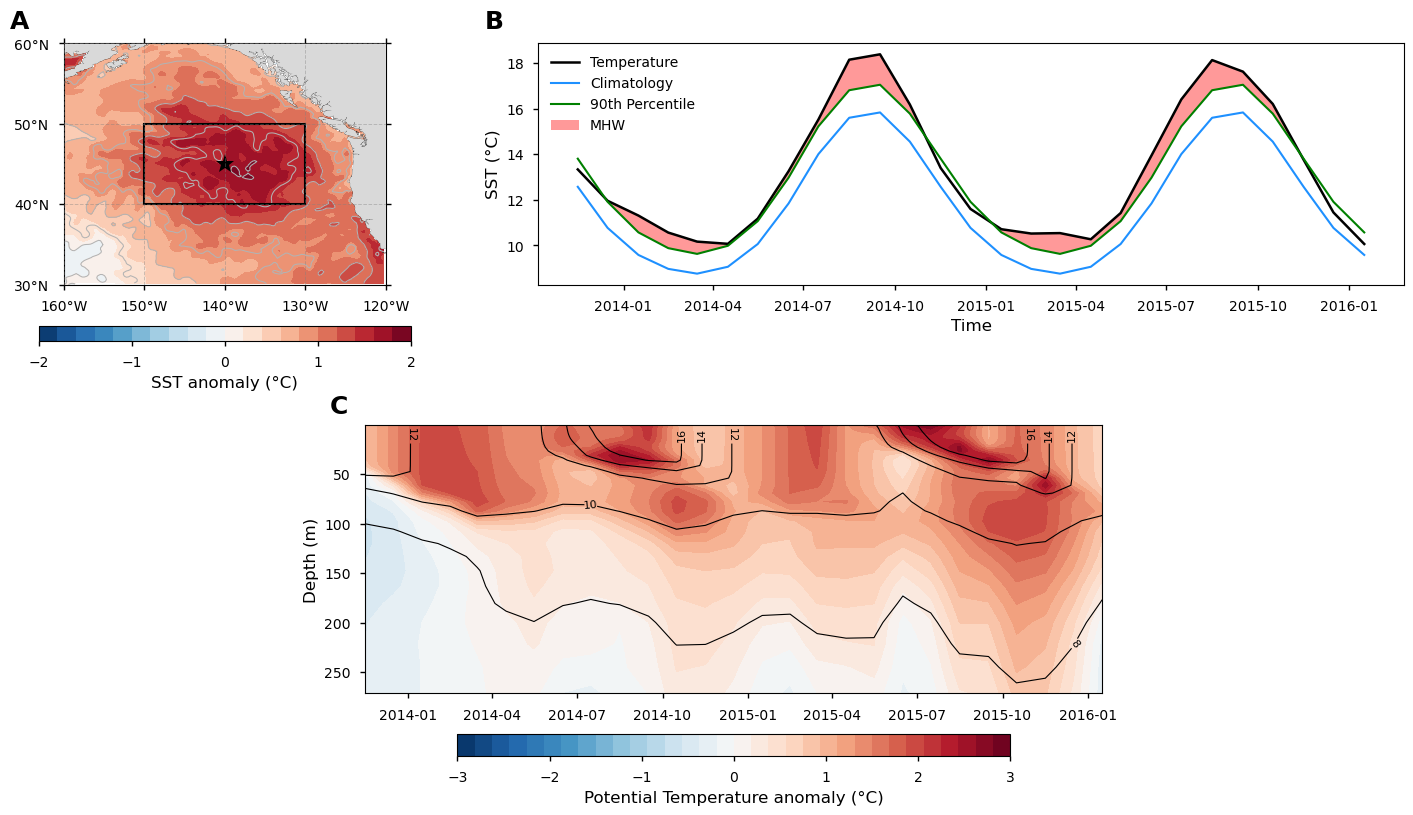

In [12]:
fig = plt.figure(figsize=(18, 10))

gs = fig.add_gridspec(
    nrows=2, ncols=2,
    width_ratios=[1, 2],
    height_ratios=[1, 1.2],
    hspace=0.35,
    wspace=0.15
)

# Figure A
ax = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree())

norm = TwoSlopeNorm(vmin=-2, vcenter=0, vmax=2) # Normalize the color scale around 0 
levels = np.linspace(-2, 2, 21)

im = ax.contourf(
    ds["longitude"], ds["latitude"], sst_anomaly_mean,
    levels=levels,
    cmap="RdBu_r",
    norm=norm,
    zorder=1,
    transform=ccrs.PlateCarree()
)

ax.add_feature(
    cfeature.LAND,
    facecolor="0.85",
    edgecolor="none",
    zorder=3
)

ax.contour(
    ds["longitude"], ds["latitude"], sst_anomaly_mean,
    colors="0.7", linewidths=0.75,
    zorder=4, transform=ccrs.PlateCarree()
)

# Rectangle NE Pacific
rect_nepac = Rectangle(
    xy=(lon_minBlob, lat_minBlob),
    width=lon_maxBlob - lon_minBlob,
    height=lat_maxBlob - lat_minBlob,
    linewidth=1.5,
    edgecolor="black",
    facecolor="none",
    zorder=10,
    transform=ccrs.PlateCarree()
)
ax.add_patch(rect_nepac)

map_lon_min, map_lon_max = -160, -120
map_lat_min, map_lat_max = 30, 60

ax.set_extent(
    [map_lon_min, map_lon_max, map_lat_min, map_lat_max],
    crs=ccrs.PlateCarree()
)

rect_border = Rectangle(
    xy=(map_lon_min, map_lat_min),
    width=map_lon_max - map_lon_min,
    height=map_lat_max - map_lat_min,
    linewidth=0.6,
    edgecolor="black",
    facecolor="none",
    zorder=20,
    transform=ccrs.PlateCarree()
)
ax.add_patch(rect_border)

ax.coastlines()

# Marker representing the center of the Blob 
lat_centerBlob = (lat_slice.start + lat_slice.stop) / 2
lon_centerBlob = (min(lon_slice.start, lon_slice.stop) +
                  max(lon_slice.start, lon_slice.stop)) / 2

ax.plot(
    lon_centerBlob, lat_centerBlob,
    marker="*", markersize=14,
    color="black",
    transform=ccrs.PlateCarree(),
    zorder=30
)

# Ticks
ax.set_xticks(range(-160, -119, 10), crs=ccrs.PlateCarree())
ax.set_yticks(range(30, 70, 10), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(cticker.LongitudeFormatter())
ax.yaxis.set_major_formatter(cticker.LatitudeFormatter())
ax.tick_params(top=True, labeltop=False, right=True, labelright=False)

for lon in range(-160, -119, 10):
    ax.plot(
        [lon, lon], [map_lat_min, map_lat_max],
        color='gray', linestyle='--', linewidth=0.7, alpha=0.4,
        transform=ccrs.PlateCarree(), zorder=50
    )

for lat in range(30, 70, 10):
    ax.plot(
        [map_lon_min, map_lon_max], [lat, lat],
        color='gray', linestyle='--', linewidth=0.7, alpha=0.4,
        transform=ccrs.PlateCarree(), zorder=50
    )

# Colorbar
cbar = plt.colorbar(
    im,
    ax=ax,
    orientation="horizontal",
    pad=0.14,
    fraction=0.05,
    aspect=25
)
cbar.set_label("SST anomaly (°C)", fontsize=12)
cbar.set_ticks([-2, -1, 0, 1, 2])

# FIGURE B
ax2 = fig.add_subplot(gs[0, 1])
map_pos = ax.get_position()
pos = ax2.get_position()
ax2.set_position([pos.x0, map_pos.y0, pos.width, map_pos.height])

line1, = ax2.plot(sst_p.time, sst_p, color="black", lw=1.8, label="Temperature")
line2, = ax2.plot(clim_p.time, clim_p, color="dodgerblue", lw=1.5, label="Climatology")
line3, = ax2.plot(pctl_p.time, pctl_p, color="green", lw=1.5, label="90th Percentile")

sst_mhw = sst_p.where(mhw_p)
ax2.fill_between(
    sst_p.time, pctl_p, sst_mhw,
    where=sst_p >= pctl_p,
    color="red", alpha=0.4, interpolate=True
)

mhw_patch = Patch(facecolor="red", alpha=0.4, label="MHW")

ax2.legend(handles=[line1, line2, line3, mhw_patch],
           loc="upper left", frameon=False)
ax2.set_ylabel("SST (°C)", fontsize=12)
ax2.set_xlabel("Time", fontsize=12)
ax2.grid(False)

# FIGURE C
ax3 = fig.add_subplot(gs[1, :])

cf = ax3.contourf(
    anomaly_z["time"],
    anomaly_z["deptht"],
    anomaly_z.T,
    levels=np.linspace(-3, 3, 33),
    cmap="RdBu_r"
)

cs = ax3.contour(
    temp_period_z["time"],
    temp_period_z["deptht"],
    temp_period_z.T,
    levels=np.arange(1.5, 16, 2),
    colors="k",
    linewidths=0.8
)

ax3.clabel(cs, fmt="%.0f", fontsize=8)
ax3.invert_yaxis()
ax3.set_ylabel("Depth (m)", fontsize=12)

# Colorbar
cax = inset_axes(
    ax3,
    width="75%",
    height="8%",
    loc="lower center",
    borderpad=-4.5
)
cbar = plt.colorbar(cf, cax=cax, orientation="horizontal")
cbar.set_label("Potential Temperature anomaly (°C)", fontsize=12)
cbar.set_ticks([-3, -2, -1, 0, 1, 2, 3])

posA = ax.get_position()
posB = ax2.get_position()
posC = ax3.get_position()
center_x = 0.5 * (posA.x0 + posB.x1)
new_width = 0.55 * (posB.x1 - posA.x0)
new_x0 = center_x - new_width / 2
new_y0 = posC.y0 + 0.12
new_height = posC.height * 0.75
ax3.set_position([new_x0, new_y0, new_width, new_height])
posC = ax3.get_position()
y_top = max(posA.y1, posB.y1)

fig.text(posA.x0 - 0.03, y_top + 0.015, "A",
         fontsize=18, fontweight="bold")
fig.text(posB.x0 - 0.03, y_top + 0.015, "B",
         fontsize=18, fontweight="bold")
fig.text(posC.x0 - 0.02, posC.y1 + 0.012, "C",
         fontsize=18, fontweight="bold")

plt.show()

In this figure, we present three subplots ordered from A to C. The first one (Figure 1A) shows SST anomalies in the NE Pacific, averaged over the period of the Blob event (November 2013 to January 2016) based on the historical climatology from 1979 to 2016. The black rectangle indicates the study area, with a marker (in this case, a star) showing the center point of the Blob. Regarding the results, warm anomalies are detected, reaching a maximum of over 2°C within the Blob. The rest of the NE Pacific also exhibits notable SST anomalies, but of smaller magnitude. Figure 1B displays the time series of monthly-averaged SST (black line). Moreover, shown are the monthly-averaged climatology (blue line), the 90th percentile threshold (green line), and MHW events (red shading). These periods indicate that SST exceeds the threshold for a minimum of three consecutive months. If we observe in more detail, the first MHW (beginning of the Blob) originated in late 2013, developed in early 2014, and dissipated by late 2014. The peak intensity of the MHW was from August to October 2014. The second MHW event started in early 2015 and continued until late 2015, with its peak from August to October 2015. The last subplot (Figure 1C) shows a time-depth section of the monthly-averaged potential temperature anomaly for the upper 300 m of the ocean. The exact location corresponds to the center of the Blob, marked by a star in Figure 1A. We can determine that the subsurface temperature anomaly extended mainly to 100 m. These anomalies were very notable during the same peak periods mentioned in Figure 1B, with maximum values around 2–3°C. Below approximately 150 m, the anomalous warming decreased to near 0°C, with slightly negative anomalies at great depths. As described in [[14]](https://doi.org/10.1038/s41612-023-00327-0), the case of the Blob extended from the surface to depths of around 140 m, with subsurface warming persisting longer than surface warming, affecting the mixed layer temperature. This was observed thanks to the Argo floats deployed in the NE Pacific [[15]](https://doi.org/10.1002/2017JC013120). Both the timming of occurrence and the magnitude of the anomalies identified here are consistent with other reanalyses, such as NOAA's GODAS [[9]](https://doi.org/10.1002/2015GL063306) and CFSR [[10]](https://doi.org/10.1029/2019JD030780), as well as in situ observations [[16]]( https://doi.org/10.1029/2021JC018356).

[[17]](https://doi.org/10.1088/1748-9326/aa67c3) explains that the 2013–2016 warm Blob was a clear precursor to the evolution of the 2015–2016 El Niño, with the two events being closely linked. Nevertheless, this relationship should be examined with caution given the complexity of the ocean–atmosphere interactions in the North Pacific.   

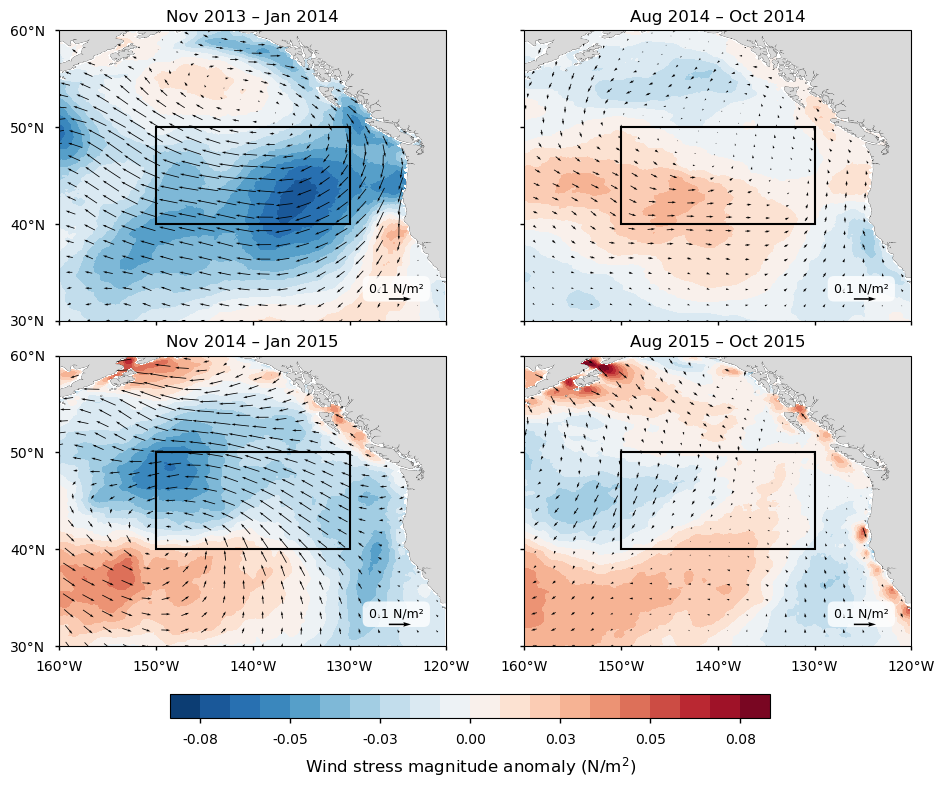

In [14]:
fig, axes = plt.subplots(
    nrows=2,
    ncols=2,
    figsize=(12, 8),
    subplot_kw={"projection": ccrs.PlateCarree()},
    gridspec_kw={"wspace":0, "hspace":0.12} 
)
axes = axes.flatten()  

vmin, vmax = np.inf, -np.inf
for title, evt_slice, months in events:
    _, _, tau_mag_anom = wind_stress_anomaly(ds, evt_slice, months)
    vmin = min(vmin, tau_mag_anom.min().values)
    vmax = max(vmax, tau_mag_anom.max().values)
vmax = max(abs(vmin), abs(vmax))
vmin = -vmax

for i, (title, evt_slice, months) in enumerate(events):
    tau_x_anom, tau_y_anom, tau_mag_anom = wind_stress_anomaly(ds, evt_slice, months)

    # Magnitude contourf 
    im = axes[i].contourf(
        ds["longitude"],
        ds["latitude"],
        tau_mag_anom,
        levels=np.linspace(vmin, vmax, 21), 
        cmap="RdBu_r",
        transform=ccrs.PlateCarree()
    )
    # Quiver
    step = 8
    Q = axes[i].quiver( 
        ds["longitude"][::step, ::step],
        ds["latitude"][::step, ::step],
        tau_x_anom[::step, ::step],
        tau_y_anom[::step, ::step],
        color="black",
        scale=1.75,
        width=0.002,
        pivot="middle",
        transform=ccrs.PlateCarree()
    ) 

    Qkey = axes[i].quiver(
    [], [], [], [],
    scale=1.75,        
    width=0.004,      
    color="black"
    )
    
    # Quiverkey
    axes[i].quiverkey(
        Qkey,
        X=0.88,
        Y=0.075,
        U=0.1,
        label="", 
        zorder=20,
        coordinates="axes"
    )
    axes[i].text(
        0.80, 0.11,
        "0.1 N/m²",
        transform=axes[i].transAxes,
        fontsize=9,
        verticalalignment='center',
        horizontalalignment='left',
        zorder=10,
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.8, boxstyle='round,pad=0.5')
    )

    # Map
    axes[i].add_feature(cfeature.LAND, facecolor="0.85", zorder=2)
    axes[i].coastlines()
    map_extent = [-160, -120, 30, 60]
    axes[i].set_extent(map_extent, crs=ccrs.PlateCarree())

    # Rectangle
    rect = Rectangle(
        xy=(lon_minBlob, lat_minBlob),
        width=lon_maxBlob - lon_minBlob,
        height=lat_maxBlob - lat_minBlob,
        linewidth=1.5,
        edgecolor="black",
        facecolor="none",
        transform=ccrs.PlateCarree(),
        zorder=10
    )
    axes[i].add_patch(rect)
    axes[i].set_title(title)
    
    # Ticks 
    axes[i].set_xticks(range(-160, -119, 10), crs=ccrs.PlateCarree())
    axes[i].set_yticks(range(30, 70, 10), crs=ccrs.PlateCarree())
    axes[i].tick_params(axis='both', which='major', length=3, width=1)
    lon_formatter = cticker.LongitudeFormatter()
    lat_formatter = cticker.LatitudeFormatter()
    
    if i % 2 == 0: 
        axes[i].yaxis.set_major_formatter(lat_formatter)
    else: 
        axes[i].yaxis.set_major_formatter(lambda x, pos: "") 
        
    if i >= 2:  
        axes[i].xaxis.set_major_formatter(lon_formatter)
    else:  
        axes[i].xaxis.set_major_formatter(lambda x, pos: "") 
        
# Colorbar (set position)
cbar_ax = fig.add_axes([0.25, 0.02, 0.5, 0.03]) 
cbar = fig.colorbar(
    im,                
    cax=cbar_ax,         
    orientation="horizontal"
)
cbar.set_label(r"Wind stress magnitude anomaly (N/m$^2$)", fontsize=12, labelpad=6)
cbar.ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))

plt.show()

This figure show wind stress magnitude anomalies for winter (November–January) and summer (August–October) during 2013–2015. During winter 2013–2014, negative wind stress anomalies dominate the NE Pacific within the Blob region (outlined box), indicating weakened surface winds prior to the onset of the MHW. In contrast, summer 2014 exhibits weaker and more spatially heterogeneous anomalies. The winter of 2014–2015 again shows predominantly negative wind stress anomalies over the same region, consistent with continued weak wind forcing. By summer 2015, positive anomalies become more pronounced, suggesting a partial recovery of wind stress. These patterns are comparable to the ones obtained in [[18]](https://doi.org/10.1175/JCLI-D-16-0348.1). Being consistent with the proposed Blob mechanism, whereby weakened winds and associated negative wind stress curl reduce vertical mixing, leading to a shallower mixed layer and sustained upper ocean warming [[14]](https://doi.org/10.1038/s41612-023-00327-0). 

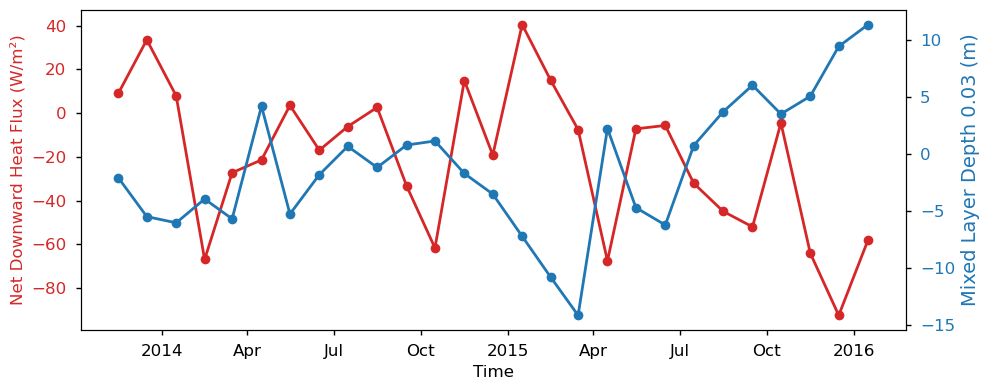

In [15]:
# Variables 
heat_flux = "sohefldo" # Net Downward Heat Flux 
mld = "somxl030" # Mixed Layer Depth 0.03

fig, ax1 = plt.subplots(figsize=(10,4))

# Net Downward Heat Flux 
anom_dict[heat_flux].plot(
    ax=ax1, color="tab:red", label=heat_flux,
    linewidth=2, marker="o"
)
ax1.set_ylabel("Net Downward Heat Flux (W/m²)", color="tab:red", fontsize=12)
ax1.tick_params(axis='y', labelcolor="tab:red", labelsize=12)
ax1.grid(False)  

# Mixed Layer Depth 0.03
ax2 = ax1.twinx()
anom_dict[mld].plot(
    ax=ax2, color="tab:blue", label=mld,
    linewidth=2, marker="o"
)
ax2.set_ylabel("Mixed Layer Depth 0.03 (m)", color="tab:blue", fontsize=14)
ax2.tick_params(axis='y', labelcolor="tab:blue", labelsize=12)

ax1.set_xlabel("Time", fontsize=12)
ax1.tick_params(axis='x', labelsize=12)

plt.tight_layout()
plt.show()

Figure 3 presents time series of the net downward heat flux (red line) and the mixed layer depth (blue line) for the Blob region from 2013 to 2016. The net downward heat flux shows two major peaks at the beginning of the MHW events, which occurred in early 2014 and 2015, indicating a major influx of energy into the ocean. These positive anomalies corresponded to periods of reduced ocean-to-atmosphere heat loss during winter, especially in the latent heat flux [[19]](https://doi.org/10.1038/s41612-025-00900-9). Regarding the mixed layer depth, its anomalies were generally negative, with a maximum negative anomaly in March 2015 (period of a MHW). In connection with the net downward heat flux, the upper ocean heating led to greater buoyancy in the mixed layer, which had a significant effect on the Blob's development [[20]](https://doi.org/10.1029/2022GL098849). At the end of the Blob, the mixed layer depth anomalies became progressively positive.    

## ℹ️ If you want to know more

### Key resources

* [CDS entry](https://cds.climate.copernicus.eu/datasets/reanalysis-oras5?tab=overview): ORAS5 global ocean reanalysis monthly data from 1958 to present. 
* Detailed information about the ORAS5 system is available at [[13]](https://doi.org/10.5194/os-15-779-2019).  

Further information: 
* [C3S EQC custom functions](https://github.com/bopen/c3s-eqc-automatic-quality-control/tree/main/c3s_eqc_automatic_quality_control), `c3s_eqc_automatic_quality_control`,  prepared by [B-Open](https://www.bopen.eu/).  

### References 

[[1]](https://doi.org/10.1146/annurev-marine-032720-095144) Oliver, E. C., Benthuysen, J. A., Darmaraki, S., Donat, M. G., Hobday, A. J., Holbrook, N. J., ... & Sen Gupta, A. (2021). Marine heatwaves. Annual review of marine science, 13(1), 313-342. doi: 10.1146/annurev-marine-032720-095144

[[2]](https://doi.org/10.5670/oceanog.2018.205) Hobday, A. J., Oliver, E. C., Gupta, A. S., Benthuysen, J. A., Burrows, M. T., Donat, M. G., ... & Smale, D. A. (2018). Categorizing and naming marine heatwaves. Oceanography, 31(2), 162-173. doi: 10.5670/oceanog.2018.205 

[[3]](https://fish.gov.au/Archived-Reports/Documents/Pearce_et_al_2011.pdf) Pearce, A., Lenanton, R., Jackson, G., Moore, J., Feng, M. and Gaughan, D. 2011. The “marine heat wave” off Western Australia during the summer of 2010/11. Fisheries Research Report No. 222. Department of Fisheries, Western Australia. 40pp. ISBN: 978-1-921845-25-3 

[[4]](https://doi.org/10.1016/j.pocean.2015.12.014) Hobday, A. J., Alexander, L. V., Perkins, S. E., Smale, D. A., Straub, S. C., Oliver, E. C., ... & Wernberg, T. (2016). A hierarchical approach to defining marine heatwaves. Progress in oceanography, 141, 227-238. doi: 10.1016/j.pocean.2015.12.014  

[[5]](https://doi.org/10.1007/s00382-019-04707-2) Oliver, E. C. (2019). Mean warming not variability drives marine heatwave trends. Climate Dynamics, 53(3), 1653-1659. doi: 10.1007/s00382-019-04707-2  

[[6]](https://doi.org/10.1038/s41586-018-0383-9) Frölicher, T. L., Fischer, E. M., & Gruber, N. (2018). Marine heatwaves under global warming. Nature, 560(7718), 360-364. doi: 10.1038/s41586-018-0383-9

[[7]](https://doi.org/10.1038/s41467-018-03732-9) Oliver, E. C., Donat, M. G., Burrows, M. T., Moore, P. J., Smale, D. A., Alexander, L. V., ... & Wernberg, T. (2018). Longer and more frequent marine heatwaves over the past century. Nature communications, 9(1), 1324. doi: 10.1038/s41467-018-03732-9

[[8]](https://doi.org/10.1038/s44358-025-00058-5) Wernberg, T., Thomsen, M. S., Burrows, M. T., Filbee-Dexter, K., Hobday, A. J., Holbrook, N. J., ... & Smith, K. (2025). Marine heatwaves as hot spots of climate change and impacts on biodiversity and ecosystem services. Nature Reviews Biodiversity, 1(7), 461-479. doi: 10.1038/s44358-025-00058-5

[[9]](https://doi.org/10.1002/2015GL063306) Bond, N. A., Cronin, M. F., Freeland, H., & Mantua, N. (2015). Causes and impacts of the 2014 warm anomaly in the NE Pacific. Geophysical Research Letters, 42(9), 3414-3420. doi: 10.1002/2015GL063306

[[10]](https://doi.org/10.1029/2019JD030780) Schmeisser, L., Bond, N. A., Siedlecki, S. A., & Ackerman, T. P. (2019). The role of clouds and surface heat fluxes in the maintenance of the 2013–2016 Northeast Pacific marine heatwave. Journal of Geophysical Research: Atmospheres, 124(20), 10772-10783. doi: 10.1029/2019JD030780 

[[11]](https://doi.org/10.1029/2018GL078242) Myers, T. A., Mechoso, C. R., Cesana, G. V., DeFlorio, M. J., & Waliser, D. E. (2018). Cloud feedback key to marine heatwave off Baja California. Geophysical Research Letters, 45(9), 4345-4352. doi: 10.1029/2018GL078242

[[12]](https://doi.org/10.1038/nclimate3082) Di Lorenzo, E., & Mantua, N. (2016). Multi-year persistence of the 2014/15 North Pacific marine heatwave. Nature Climate Change, 6(11), 1042-1047. doi: 10.1038/nclimate3082

[[13]](https://doi.org/10.5194/os-15-779-2019) Zuo, H., Balmaseda, M. A., Tietsche, S., Mogensen, K., & Mayer, M. (2019). The ECMWF operational ensemble reanalysis–analysis system for ocean and sea ice: a description of the system and assessment. Ocean science, 15(3), 779-808. doi: 10.5194/os-15-779-2019

[[14]](https://doi.org/10.1038/s41612-023-00327-0) Chen, H. H., Wang, Y., Xiu, P., Yu, Y., Ma, W., & Chai, F. (2023). Combined oceanic and atmospheric forcing of the 2013/14 marine heatwave in the northeast Pacific. npj Climate and Atmospheric Science, 6(1), 3. doi: 10.1038/s41612-023-00327-0

[[15]](https://doi.org/10.1002/2017JC013120) Chao, Y., Farrara, J. D., Bjorkstedt, E., Chai, F., Chavez, F., Rudnick, D. L., ... & Ateljevich, E. (2017). The origins of the anomalous warming in the C alifornia coastal ocean and S an F rancisco B ay during 2014–2016. Journal of Geophysical Research: Oceans, 122(9), 7537-7557. doi: 10.1002/2017JC013120

[[16]]( https://doi.org/10.1029/2021JC018356) Holser, R. R., Keates, T. R., Costa, D. P., & Edwards, C. A. (2022). Extent and magnitude of subsurface anomalies during the Northeast Pacific Blob as measured by animal‐borne sensors. Journal of Geophysical Research: Oceans, 127(7), e2021JC018356. doi: 10.1029/2021JC018356

[[17]](https://doi.org/10.1088/1748-9326/aa67c3) Tseng, Y. H., Ding, R., & Huang, X. M. (2017). The warm Blob in the northeast Pacific—the bridge leading to the 2015/16 El Niño. Environmental Research Letters, 12(5), 054019. doi: 10.1088/1748-9326/aa67c3

[[18]](https://doi.org/10.1175/JCLI-D-16-0348.1) Hu, Z., Kumar, A., Jha, B., Zhu, J., & Huang., B. (2017): Persistence and Predictions of the Remarkable Warm Anomaly in the Northeastern Pacific Ocean during 2014–16. J. Climate, 30, 689–702, doi: 10.1175/JCLI-D-16-0348.1

[[19]](https://doi.org/10.1038/s41612-025-00900-9) Chen, H. H., Wang, Y., Li, X., Wan, L., Yuan, Y., Yan, Y., ... & Chai, F. (2025). Arctic warming as a potential trigger for the warm blob in the northeast Pacific. npj Climate and Atmospheric Science, 8(1), 111. doi: 10.1038/s41612-025-00900-9 

[[20]](https://doi.org/10.1029/2022GL098849) Shi, J., Tang, C., Liu, Q., Zhang, Y., Yang, H., & Li, C. (2022). Role of mixed layer depth in the location and development of the Northeast Pacific warm blobs. Geophysical Research Letters, 49(16), e2022GL098849. doi: 10.1029/2022GL098849 